In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [3]:
yt = pd.read_csv('USvideos_modified.csv', encoding='latin1',dtype={'last_trending_date': str})
yt.head()

C:\Users\fajar\AppData\Local\Temp\ipykernel_17144\4229730100.py:1: DtypeWarning: Columns (0,2,5,10,11,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  yt = pd.read_csv('USvideos_modified.csv', encoding='latin1',dtype={'last_trending_date': str})


,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,20-11-2017,13-11-2017,17.0,category_id,CaseyNeistat,2564903.0,96321.0,7972.0,22149.0,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7.0,7.0,2.0,2.0,1.0,9086142.0
1,1ZAPwfrtAFY,20-11-2017,13-11-2017,7.0,category_id,LastWeekTonight,6109402.0,151250.0,11508.0,19820.0,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7.0,7.0,65.0,69.0,4.0,5937292.0
2,5qpjK5DgCt4,20-11-2017,12-11-2017,19.0,category_id,Rudy Mancuso,5315471.0,187303.0,7278.0,9990.0,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,7.0,8.0,68.0,426.0,23.0,4191209.0
3,puqaWrEC7tY,20-11-2017,13-11-2017,11.0,category_id,Good Mythical Morning,913268.0,16729.0,1386.0,2988.0,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7.0,7.0,488.0,1246.0,28.0,13186408.0
4,d380meD0W0M,19-11-2017,12-11-2017,18.0,category_id,nigahiga,2819118.0,153395.0,2416.0,20573.0,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6.0,7.0,488.0,1007.0,14.0,20563106.0


In [178]:
#showing info of data
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   video_id                     4547 non-null     object        
 1   last_trending_date           0 non-null        datetime64[ns]
 2   publish_date                 4547 non-null     object        
 3   publish_hour                 4547 non-null     float64       
 4   category_id                  1048575 non-null  object        
 5   channel_title                4547 non-null     object        
 6   views                        4547 non-null     float64       
 7   likes                        4547 non-null     float64       
 8   dislikes                     4547 non-null     float64       
 9   comment_count                4547 non-null     float64       
 10  comments_disabled            4547 non-null     object        
 11  ratings_dis

In [180]:
#description of youtube
yt.describe()

,last_trending_date,publish_hour,views,likes,dislikes,comment_count,tag_appeared_in_title_count,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
count,0,4547.000000,4.547000e+03,4.547000e+03,4.547000e+03,4.547000e+03,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4.525000e+03
mean,NaT,13.503189,1.265665e+06,3.919696e+04,2.616788e+03,4.938788e+03,2.961293,4.830658,34.429954,130.335386,437.941060,19.209369,3.164303e+06
min,NaT,0.000000,5.590000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,NaT,8.000000,9.089650e+04,1.486000e+03,7.600000e+01,2.260000e+02,1.000000,3.000000,5.000000,22.000000,68.000000,9.000000,2.466470e+05
50%,NaT,15.000000,3.188400e+05,7.397000e+03,2.910000e+02,8.540000e+02,3.000000,5.000000,6.000000,85.000000,217.000000,18.000000,1.198769e+06
75%,NaT,18.000000,1.006673e+06,2.557550e+04,1.023000e+03,2.862500e+03,4.000000,7.000000,7.000000,151.000000,515.000000,29.000000,3.766915e+06
max,NaT,23.000000,1.493761e+08,3.093544e+06,1.674420e+06,1.361580e+06,18.000000,14.000000,4215.000000,488.000000,3644.000000,69.000000,2.867694e+07
std,NaN,6.548420,4.526133e+06,1.419793e+05,3.662803e+04,3.110122e+04,2.482547,2.614707,247.514298,150.400756,616.584168,12.452361,4.831613e+06


In [153]:
#showing shape of data
print(f"The shape of youtube data is"yt.shape)

The shape of youtube data is (1048575, 23)


(         video_id last_trending_date publish_date  publish_hour  category_id  \
 0     2kyS6SvSYSE         20-11-2017   13-11-2017          17.0  category_id   
 1     1ZAPwfrtAFY         20-11-2017   13-11-2017           7.0  category_id   
 2     5qpjK5DgCt4         20-11-2017   12-11-2017          19.0  category_id   
 3     puqaWrEC7tY         20-11-2017   13-11-2017          11.0  category_id   
 4     d380meD0W0M         19-11-2017   12-11-2017          18.0  category_id   
 ...           ...                ...          ...           ...          ...   
 4543  _CFJ1u-DIBc         05-03-2018   02-03-2018          19.0  category_id   
 4544  Juad74hE6rs         05-03-2018   01-03-2018          16.0  category_id   
 4545  n_S8d_1KVhU         05-03-2018   01-03-2018          18.0  category_id   
 4546  Eouvsy8JdLU         05-03-2018   27-02-2018          16.0  category_id   
 4547          NaN                NaN          NaN           NaN  category_id   
 
               channel_tit

In [156]:
#removing duplicates and cleaning data
yt_clean=yt.drop_duplicates()
cleaned_shape=yt_clean.shape
yt_clean,cleaned_shape

(         video_id last_trending_date publish_date  publish_hour  category_id  \
 0     2kyS6SvSYSE         20-11-2017   13-11-2017          17.0  category_id   
 1     1ZAPwfrtAFY         20-11-2017   13-11-2017           7.0  category_id   
 2     5qpjK5DgCt4         20-11-2017   12-11-2017          19.0  category_id   
 3     puqaWrEC7tY         20-11-2017   13-11-2017          11.0  category_id   
 4     d380meD0W0M         19-11-2017   12-11-2017          18.0  category_id   
 ...           ...                ...          ...           ...          ...   
 4543  _CFJ1u-DIBc         05-03-2018   02-03-2018          19.0  category_id   
 4544  Juad74hE6rs         05-03-2018   01-03-2018          16.0  category_id   
 4545  n_S8d_1KVhU         05-03-2018   01-03-2018          18.0  category_id   
 4546  Eouvsy8JdLU         05-03-2018   27-02-2018          16.0  category_id   
 4547          NaN                NaN          NaN           NaN  category_id   
 
               channel_tit

In [160]:
# Initialize the VADER analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to apply sentiment analysis
def get_sentiment(text):
    if pd.isna(text): 
        return {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
    return analyzer.polarity_scores(str(text))
# Apply to 'title' and 'tags'
title_sentiment = yt['title'].apply(get_sentiment).apply(pd.Series)
tags_sentiment = yt['tags'].apply(get_sentiment).apply(pd.Series)
# Rename columns for clarity
title_sentiment.columns = [f"title_{col}" for col in title_sentiment.columns]
tags_sentiment.columns = [f"tags_{col}" for col in tags_sentiment.columns]
# Combine with original dataframe
sentiment_df = pd.concat([yt, title_sentiment, tags_sentiment], axis=1)
print ("Sentiment Analysis")
# Show summary statistics
print(sentiment_df[['title_neg', 'title_neu', 'title_pos', 'title_compound',
                    'tags_neg', 'tags_neu', 'tags_pos', 'tags_compound']].describe())

Sentiment Analysis
          title_neg     title_neu     title_pos  title_compound      tags_neg  \
count  1.048575e+06  1.048575e+06  1.048575e+06    1.048575e+06  1.048575e+06   
mean   2.830737e-04  3.640237e-03  4.130425e-04    1.789818e-04  9.058866e-05   
std    1.015086e-02  5.675145e-02  1.263414e-02    2.138163e-02  5.028553e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00   -9.299000e-01  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00   
max    7.960000e-01  1.000000e+00  1.000000e+00    9.450000e-01  8.820000e-01   

           tags_neu      tags_pos  tags_compound  
count  1.048575e+06  1.048575e+06   1.048575e+06  
mean   3.886419e-03  1.609890e-04   1.771593e-04  
std    6.080591e-02  6.866852e-03   1.921508e-02  
min    0.000000e+00  0.000000e+00  -9.916000e-0

In [172]:
import sqlite3
# Save the DataFrame to SQLite
conn = sqlite3.connect(":memory:")
yt.to_sql("videos", conn, index=False, if_exists='replace')

query="""
SELECT category_id, 
       AVG(views) AS avg_views
FROM videos
GROUP BY category_id
ORDER BY avg_views DESC
"""
avg_views_df = pd.read_sql_query(query, conn)
print(avg_views_df)

   category_id     avg_views
0  category_id  1.265665e+06


In [173]:
print(yt[['video_id', 'last_trending_date', 'publish_date']].head())

      video_id last_trending_date publish_date
0  2kyS6SvSYSE         20-11-2017   13-11-2017
1  1ZAPwfrtAFY         20-11-2017   13-11-2017
2  5qpjK5DgCt4         20-11-2017   12-11-2017
3  puqaWrEC7tY         20-11-2017   13-11-2017
4  d380meD0W0M         19-11-2017   12-11-2017


C:\Users\fajar\AppData\Local\Temp\ipykernel_17144\1205265537.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_trending, x='trending_days', y='title', palette='viridis')


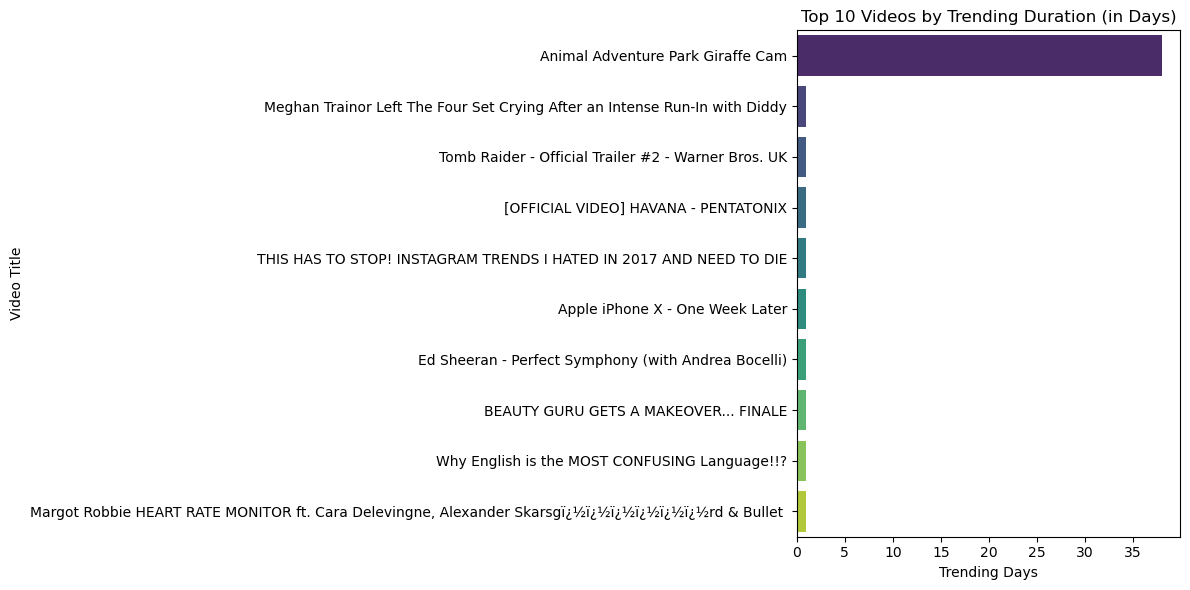

In [10]:

# Convert datetime columns
yt['last_trending_date'] = pd.to_datetime(yt['last_trending_date'], format='%d-%m-%Y', errors='coerce')
yt['publish_date'] = pd.to_datetime(yt['publish_date'], format='%d-%m-%Y', errors='coerce')

# Filter valid entries
yt_valid = yt[yt['video_id'].notnull()]

# Fix last_trending_date parsing using dayfirst=True
yt['last_trending_date'] = pd.to_datetime(yt['last_trending_date'], dayfirst=True, errors='coerce')

# Calculate trending duration (number of unique trending days)
trending_duration = yt_valid.groupby('video_id')['last_trending_date'].nunique().reset_index()
trending_duration.columns = ['video_id', 'trending_days']

# Merge with video titles for context
video_titles = yt_valid[['video_id', 'title', 'category_id']].drop_duplicates(subset='video_id')
trending_duration = trending_duration.merge(video_titles, on='video_id', how='left')

# Get top 10 trending videos
top_trending = trending_duration.sort_values(by='trending_days', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_trending, x='trending_days', y='title', palette='viridis')
plt.title('Top 10 Videos by Trending Duration (in Days)')
plt.xlabel('Trending Days')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()